# Perceptron monocapa

Un perceptrón monocapa está compuesto de una capa pasiva de entrada, y una sola capa activa que también sirve de capa de salida.

El input de un perceptron determina el estado de las neuronas pasivas de la capa de entrada, $x$.
Se considera, además, una neurona pasiva de estado fijo $x_{n_e}=-1$, para que haga las veces de umbral de activación.
Ante una entrada $x$, la salida de la red neuronal viene dada por
$$
y_j(x)
=
g(h_{j}(x))
$$
donde
$$
h_j
=
%\sum_{i=1}^{n_e}
\sum_i
w_{ji}x_i
$$
para $j=1,...,n_s$, y $g$ es una función de activación.
Por ejemplo, una ReLU, la cual viene dada por
$g(h) = h$ si $h>0$ y $g(h)=0$ si $h\leq 0$.

Para entrenar la red, usamos como función costo el error cuadrático sobre el conjunto de entrenamiento $\{e_m,s_m:m=1,...,M\}$, al cuál lo expresamos como una función de $w$
$$
E(w)
=
\frac{1}{2}
%\sum_{m=1}^M
\sum_{m}
%\sum_{j=1}^{n_s}
\sum_{j}
(y_{jm}(w)-s_{mj})^2
$$
donde $s_{mj}$ es la salida deseada en la $j$-ésima neurona ante el $m$-ésimo ejemplo, $y_{mj}$ es la salida obtenida en la $j$-esima neurona ante el $m$-ésimo ejemplo, y $n_s$ es el número de neuronas de salida.
Por otro lado,
$$
y_{jm}(w)
=
g(h_{jm}(w))
$$
donde
$$
h_{jm}(w)
=
\sum_{i=0}^{n_e}
w_{ji}e_{mi}
$$
Nos interesa calcular el gradiente de $E(w)$
\begin{eqnarray}
\frac{\partial E}{\partial w_{pq}}
&=&
%\sum_{m=1}^M
\sum_m
%\sum_{j=1}^{n_s}
\sum_j
(y_{jm}(w)-s_{mj})
\frac{\partial y_{jm}}{\partial w_{pq}}
\\
&=&
%\sum_{m=1}^M
\sum_m
%\sum_{j=1}^{n_s}
\sum_j
(y_{jm}(w)-s_{mj})
g'(h_{jm}(w))
\frac{\partial h_{jm}}{\partial w_{pq}}
\\
&=&
%\sum_{m=1}^M
\sum_m
%\sum_{j=1}^{n_s}
\sum_j
(y_{jm}(w)-s_{mj})
g'(h_{jm}(w))
\delta_{jp}
e_{mq}
\\
&=&
%\sum_{m=1}^M
\sum_m
(y_{pm}(w)-s_{mp})
g'(h_{pm}(w))
e_{mq}
\end{eqnarray}
puesto que
$$
\frac{\partial h_{jm}}{\partial w_{pq}}
=
%\sum_{i=1}^{n_e}
\sum_i
\frac{w_{ji}}{w_{pq}}
e_{mi}
=
%\sum_{i=1}^{n_e}
\sum_i
\delta_{jp}
\delta_{iq}
e_{mi}
=
\delta_{jp}
e_{mq}
$$

Recordar que, en el caso de una ReLU, $g'(h)=\Theta(h)$, donde $\Theta(h)=1$ si $h>0$ y $\Theta(h)=0$ si $h\leq 0$.

Para actualizar los pesos sinápticos en la $(\tau+1)$-ésima época de entrenamiento, utilice la regla
$$
w^{\tau}_{ji} \to w^{\tau+1}_{ji} = w^{\tau}_{ji} - \eta \frac{\partial E}{\partial w_{ji}}
$$
para todo $ji$.

## **Ejercicio 1**

Genere un conjunto de entrenamiento compuesto por $M$ puntos en $\mathbb{R}^{n_e}$, distribuidos en $n_s$ nubes, con $m_c$ puntos en la nube $c$.
Notar que $c=1,...,n_e$ nubes y, en total, se generarán $M=\sum_c m_c$ puntos.

Para generar las nubes:

* genere aleatoriamente $n_s$ puntos en $\mathbb{R}^{n_e}$ a los que llamaremos centros, sorteando los valores de las coordenadas a partir de una distribución normal, y

* para cada centro $c$, genere $m_c$ puntos aleatorios alrededor del mismo, sumando sus coordenadas a números aleatorios generados con una Gaussiana de desviación estandard $\sigma=0.1$.

Las $n_e$ coordenadas del $m$-ésimo punto constituirán el vector de entrada del $m$-ésimo ejemplo.
La nube a la que pertenece el $m$-ésimo punto determinará el vector de salida del $m$-ésimo ejemplo.
Más precisamente, si el $m$-ésimo punto pertenence a la $c$-ésima nube, el vector de salida será el vector canónico $(0,0,...,1,...,0)$ de $n_s$ componentes con un único 1 en la $c$-esima posición.

Concretamente

1. Genere un conjunto de 8 puntos en $\mathbb{R}^{n_e}$ con $n_e=2$, divididos en 3 nubes con $m_1=3$ en la primera nube, $m_2=2$ puntos en la segunda nube y $m_3=3$ puntos en la tercera nube. Utilice $\sigma=0.1$ para indicar la dispersión de los puntos alrededor de cada nube.

2. Grafique las nubes de puntos, utilizando un color distinto para cada una de ellas.

**IMPORTANTE:** No olvide extender la entrada con una unidad extra de estado fijo $x_{n_e+1}=-1$ para que las sinapsis $w_{j,n_e+1}$ hagan las veces de umbrales $u_j$.

## **Ejercicio 2**

Implemente y entrene un **perceptrón monocapa** sobre el conjunto de entrenamiento generado en el Ejercicio 1.
Utilice funciones de activación **sigmoideas** y, además, recuerde agregar las neuronas auxiliares que permiten imitar los umbrales de activación.

Para entrenarlo, utilice una taza $\eta=0.02$ y alrededor de 500.000 de épocas o más, según considere necesario.

Luego, grafique nuevamente los puntos, pintando el relleno de los mismos con los colores de las nubes asociadas, y el borde de los mismos con el color correspondiente a la predicción.
Grafique, además, las predicciones antes de entrar con el fin de corroborar que la red sin entregar clasifica erroneamente los ejemplos.

## **Ejercicio 3**

La compuerta XOR.

El siguiente conjunto de 4 ejemplos:

* $e_1 = (0,0,-1)$, $s_1=(1,0)$
* $e_2 = (0,1,-1)$, $s_2=(0,1)$
* $e_3 = (1,0,-1)$, $s_3=(0,1)$
* $e_4 = (1,1,-1)$, $s_4=(1,0)$

corresponde a la compuerta XOR.
Utilice el **perceptrón monocapa** implementando para verificar que el mismo no es capáz de aprender este conjunto de ejemplos.

## **Ejercicio 4**

Repita los experimentos utilizando funciones de activación de tipo **ReLU**.

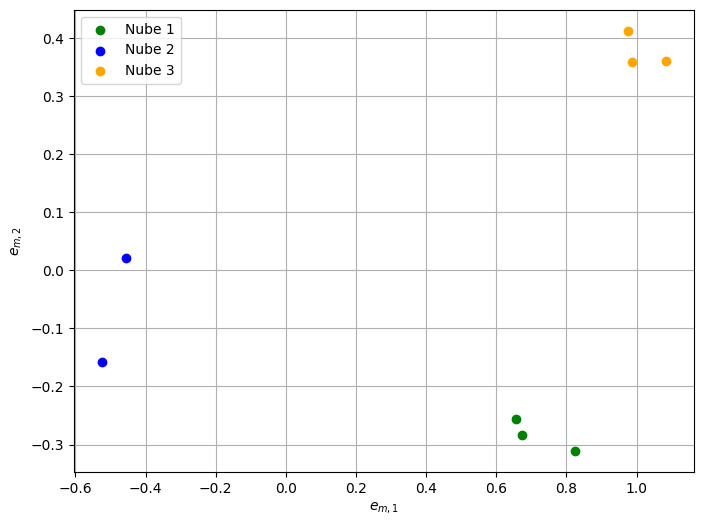

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración de los parámetros
ne = 2       # Dimensión del espacio que serian las entradas
ns = 3       # Número de nubes y tambien de las salidas
mc = [3, 2, 3]  # Cantidad de puntos en cada nube
sigma = 0.1  # Dispersión de los puntos alrededor de cada nube

# Generación de los centros de las nubes
centros = np.random.randn(ns, ne)

# Ajuste manual del centro de la nube azul para que esté más abajo
centros[1, :] = [-0.5, 0.0]  # Cambia la posición según se necesite para que esté más abajo

# Generación de los puntos alrededor de cada centro
puntos = []
etiquetas = []
for c in range(ns):
    nube_puntos = centros[c] + sigma * np.random.randn(mc[c], ne)
    puntos.append(nube_puntos)
    # Generar el vector canónico de salida
    etiqueta = np.zeros(ns)
    etiqueta[c] = 1
    etiquetas.extend([etiqueta] * mc[c])

# Convertir lista de puntos y etiquetas a matrices numpy
puntos = np.vstack(puntos)
etiquetas = np.array(etiquetas)

# Agregar una unidad extra de estado fijo x_{ne+1} = -1
puntos = np.hstack((puntos, -np.ones((puntos.shape[0], 1))))

# Graficar las nubes de puntos
colores = ['green', 'blue', 'orange']
plt.figure(figsize=(8, 6))
for c in range(ns):
    plt.scatter(puntos[np.where(etiquetas[:, c] == 1)[0], 0],
                puntos[np.where(etiquetas[:, c] == 1)[0], 1],
                color=colores[c], label=f'Nube {c+1}')

plt.xlabel(r'$e_{m,1}$')
plt.ylabel(r'$e_{m,2}$')
plt.legend()
plt.grid(True)
plt.show()


Entrenamiento detenido en la época 2806 con MSE: 0.0100


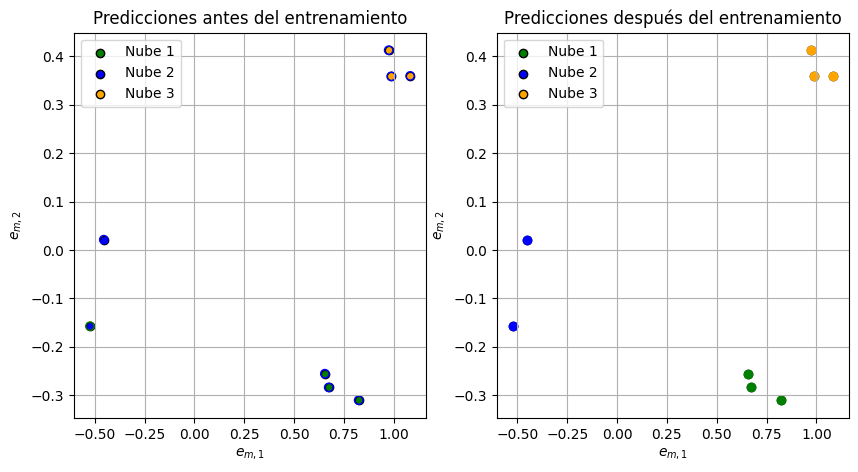

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de entrenamiento
eta = 0.02  # Tasa de aprendizaje
epochs = 500000  # Número de épocas
tolerance = 0.01  # Error de tolerancia para detener el entrenamiento

# Función sigmoidea
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la función sigmoidea
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Función de predicción del perceptrón
def predict(X, W):
    return sigmoid(np.dot(X, W))

# Entrenamiento del perceptrón
def train_perceptron(X, y, eta, epochs, tolerance):
    W = np.random.randn(X.shape[1], y.shape[1]) * 0.01  # Inicialización aleatoria de pesos
    for epoch in range(epochs):
        # Calcular las predicciones
        y_pred = predict(X, W)
        # Calcular el error
        error = y - y_pred
        # Calcular el gradiente
        gradient = np.dot(X.T, error * sigmoid_derivative(y_pred))
        # Actualizar los pesos
        W += eta * gradient
        # Calcular el error cuadrático medio
        mse = np.mean(error**2)
        if mse < tolerance:
            print(f"Entrenamiento detenido en la época {epoch} con MSE: {mse:.4f}")
            break
    return W

# Datos de entrada y salida
X = puntos  # Conjunto de entrenamiento extendido con la unidad adicional -1
y = etiquetas  # Vectores de salida (etiquetas)

# Graficar predicciones antes del entrenamiento
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for c in range(ns):
    # Puntos reales con colores de las nubes
    plt.scatter(X[np.where(y[:, c] == 1)[0], 0],
                X[np.where(y[:, c] == 1)[0], 1],
                color=colores[c], label=f'Nube {c+1}', edgecolor='k')

# Predicciones antes del entrenamiento
predicciones_iniciales = np.argmax(predict(X, np.random.randn(X.shape[1], ns)), axis=1)
for i, pred in enumerate(predicciones_iniciales):
    plt.scatter(X[i, 0], X[i, 1], facecolor='none', edgecolor=colores[pred])

plt.title("Predicciones antes del entrenamiento")
plt.xlabel(r'$e_{m,1}$')
plt.ylabel(r'$e_{m,2}$')
plt.legend()
plt.grid(True)

# Entrenar el perceptrón
W = train_perceptron(X, y, eta, epochs, tolerance)

# Graficar predicciones después del entrenamiento
plt.subplot(1, 2, 2)
for c in range(ns):
    plt.scatter(X[np.where(y[:, c] == 1)[0], 0],
                X[np.where(y[:, c] == 1)[0], 1],
                color=colores[c], label=f'Nube {c+1}', edgecolor='k')

# Predicciones después del entrenamiento
predicciones_finales = np.argmax(predict(X, W), axis=1)
for i, pred in enumerate(predicciones_finales):
    plt.scatter(X[i, 0], X[i, 1], facecolor=colores[np.argmax(y[i])], edgecolor=colores[pred])

plt.title("Predicciones después del entrenamiento")
plt.xlabel(r'$e_{m,1}$')
plt.ylabel(r'$e_{m,2}$')
plt.legend()
plt.grid(True)

plt.show()


Entrenamiento detenido en la época 2811 con MSE: 0.0100


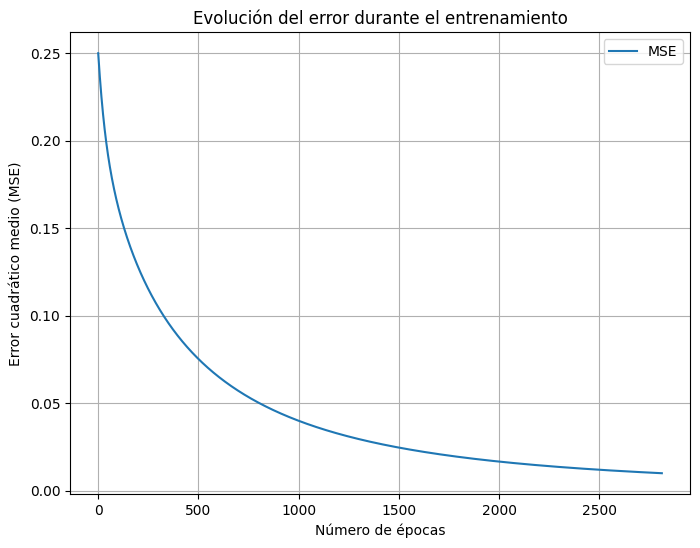

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt

# Parámetros de entrenamiento
eta = 0.02  # Tasa de aprendizaje
epochs = 500000  # Número de épocas
tolerance = 0.01  # Error de tolerancia para detener el entrenamiento

# Función sigmoidea
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la función sigmoidea
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Función de predicción del perceptrón
def predict(X, W):
    return sigmoid(np.dot(X, W))

# Entrenamiento del perceptrón
def train_perceptron(X, y, eta, epochs, tolerance):
    W = np.random.randn(X.shape[1], y.shape[1]) * 0.01  # Inicialización aleatoria de pesos
    mse_history = []  # Historial del error cuadrático medio en cada época
    for epoch in range(epochs):
        # Calcular las predicciones
        y_pred = predict(X, W)
        # Calcular el error
        error = y - y_pred
        # Calcular el gradiente
        gradient = np.dot(X.T, error * sigmoid_derivative(y_pred))
        # Actualizar los pesos
        W += eta * gradient
        # Calcular el error cuadrático medio
        mse = np.mean(error**2)
        mse_history.append(mse)
        if mse < tolerance:
            print(f"Entrenamiento detenido en la época {epoch} con MSE: {mse:.4f}")
            break
    return W, mse_history

# Datos de entrada y salida
X = puntos  # Conjunto de entrenamiento extendido con la unidad adicional -1
y = etiquetas  # Vectores de salida (etiquetas)

# Entrenar el perceptrón y obtener el historial de errores
W, mse_history = train_perceptron(X, y, eta, epochs, tolerance)

# Graficar el error vs número de épocas
plt.figure(figsize=(8, 6))
plt.plot(mse_history, label='MSE')
plt.xlabel('Número de épocas')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Evolución del error durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


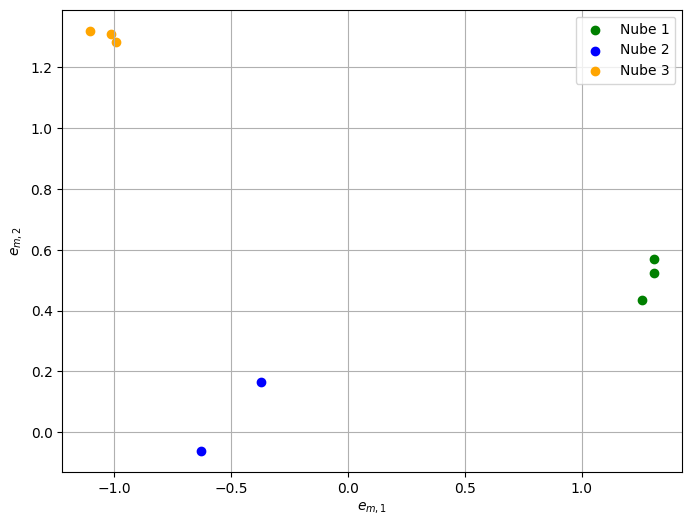

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración de los parámetros
ne = 2       # Dimensión del espacio que serian las entradas
ns = 3       # Número de nubes y tambien de las salidas
mc = [3, 2, 3]  # Cantidad de puntos en cada nube
sigma = 0.1  # Dispersión de los puntos alrededor de cada nube

# Generación de los centros de las nubes
centros = np.random.randn(ns, ne)

# Ajuste manual del centro de la nube azul para que esté más abajo
centros[1, :] = [-0.5, 0.0]  # Cambia la posición según se necesite para que esté más abajo

# Generación de los puntos alrededor de cada centro
puntos = []
etiquetas = []
for c in range(ns):
    nube_puntos = centros[c] + sigma * np.random.randn(mc[c], ne)
    puntos.append(nube_puntos)
    # Generar el vector canónico de salida
    etiqueta = np.zeros(ns)
    etiqueta[c] = 1
    etiquetas.extend([etiqueta] * mc[c])

# Convertir lista de puntos y etiquetas a matrices numpy
puntos = np.vstack(puntos)
etiquetas = np.array(etiquetas)

# Agregar una unidad extra de estado fijo x_{ne+1} = -1
puntos = np.hstack((puntos, -np.ones((puntos.shape[0], 1))))

# Graficar las nubes de puntos
colores = ['green', 'blue', 'orange']
plt.figure(figsize=(8, 6))
for c in range(ns):
    plt.scatter(puntos[np.where(etiquetas[:, c] == 1)[0], 0],
                puntos[np.where(etiquetas[:, c] == 1)[0], 1],
                color=colores[c], label=f'Nube {c+1}')

plt.xlabel(r'$e_{m,1}$')
plt.ylabel(r'$e_{m,2}$')
plt.legend()
plt.grid(True)
plt.show()

Error cuadrático medio después del entrenamiento: 0.0000


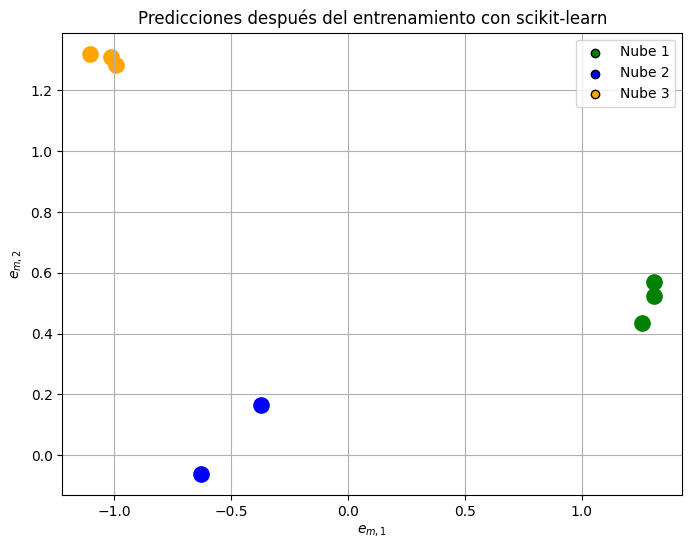

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error

# Configuración de los parámetros de entrenamiento
eta = 0.02
epochs = 500000

# Datos de entrada y salida (X y y) de los datos generados en pasos anteriores
X = puntos[:, :2]  # Excluimos la columna adicional de -1, ya que scikit-learn gestiona los umbrales
y = np.argmax(etiquetas, axis=1)  # Convertimos las etiquetas a valores discretos para scikit-learn

# Inicializar el modelo Perceptron de scikit-learn
model = Perceptron(max_iter=epochs, eta0=eta, tol=1e-3, random_state=0)

# Entrenar el modelo
model.fit(X, y)

# Predicciones y cálculo del error
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

# Imprimir el MSE final
print(f"Error cuadrático medio después del entrenamiento: {mse:.4f}")

# Graficar los puntos con las predicciones
plt.figure(figsize=(8, 6))
for c in range(ns):
    # Puntos reales con colores de las nubes
    plt.scatter(X[np.where(y == c)[0], 0], X[np.where(y == c)[0], 1],
                color=colores[c], label=f'Nube {c+1}', edgecolor='k')

# Predicciones después del entrenamiento
for i, pred in enumerate(y_pred):
    plt.scatter(X[i, 0], X[i, 1], facecolor=colores[y[i]], edgecolor=colores[pred], s=100, linewidth=2)

plt.title("Predicciones después del entrenamiento con scikit-learn")
plt.xlabel(r'$e_{m,1}$')
plt.ylabel(r'$e_{m,2}$')
plt.legend()
plt.grid(True)
plt.show()
